## **Hyperparameter Tunninng of Models**

The process of choosing the optimal parameter is called as "Hypertuning".

In this project, we aimed to enhance the performance of a spam email classification model by systematically tuning its hyperparameters using Grid Search and Random Search methods.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
# Loading dataet 
df = pd.read_csv('D:\Machine Learning Bootcamp\---Courses & Internships---\CodexCue\\emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


**Data Preprocessing**

In [3]:
df.columns.unique()

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [4]:
df.shape

(5172, 3002)

In [5]:
df.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [6]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [8]:
df.isnull()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [10]:
# Converting categorical features
le = LabelEncoder()
df['Email No.'] = le.fit_transform(df['Email No.'])
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,2222,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Separate features and target variable
X = df.drop('Prediction', axis=1)
y = df['Prediction']


In [12]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

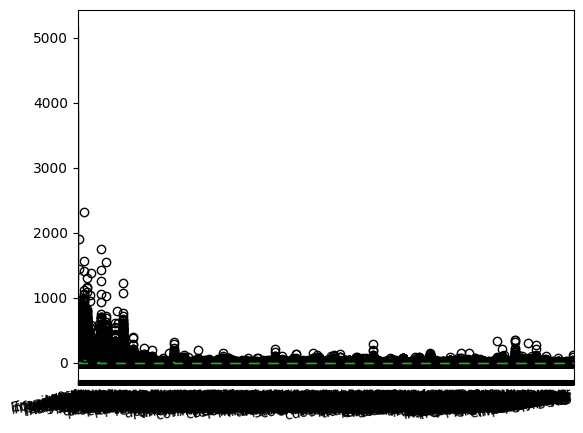

In [13]:
#Checking for outlier
df.plot.box()
plt.xticks(rotation=10, ha='right');

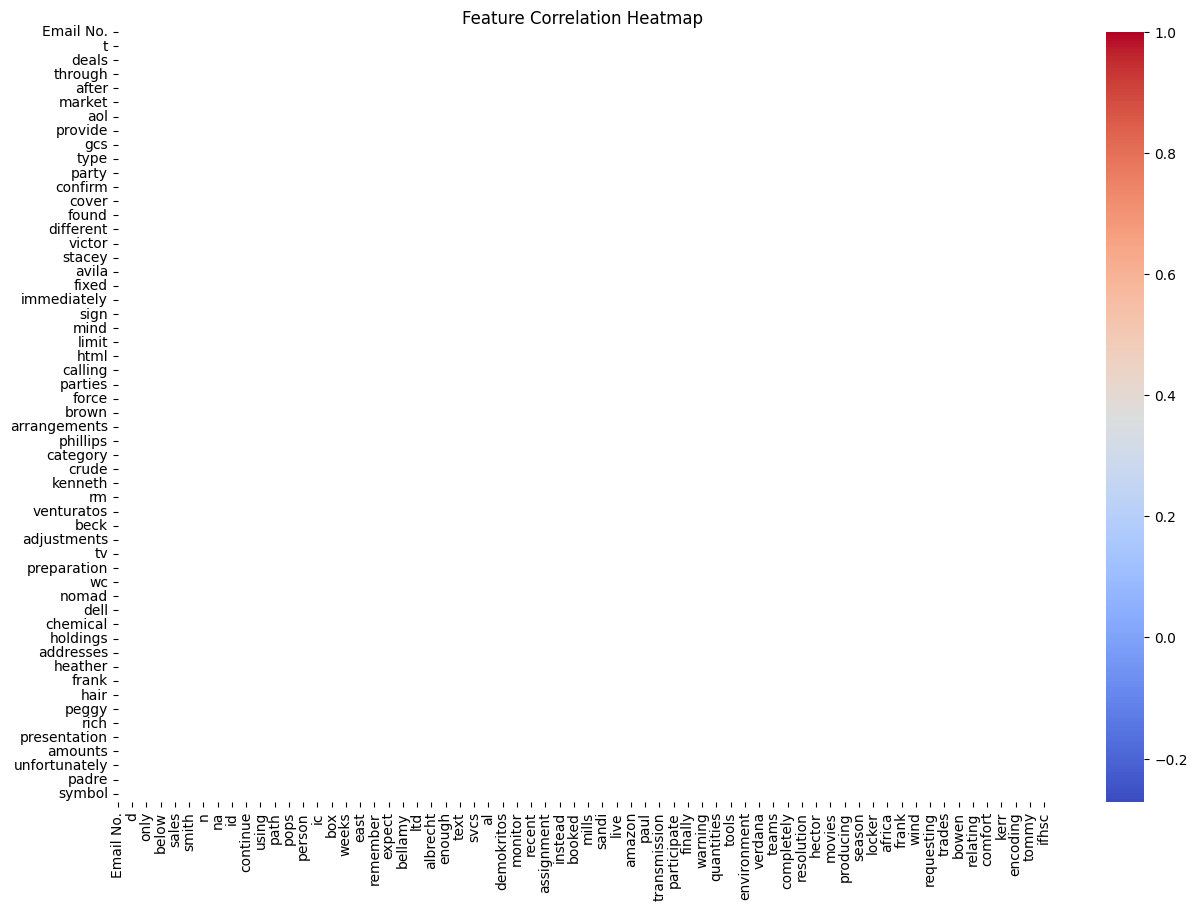

In [14]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

**Splitting data**

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Build Model**

In [16]:
log_reg = LogisticRegression()

**Hyperparameter on model**

<u>Building Parameter Grid:</u>

A predefined set of hyperparameters and their values used to systematically search for the best combination during hyperparameter tuning.

In [17]:
# Defining the parameter grid
param_grid = [{
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  #default
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [10, 20, 50, 100]
}
]

<u>Building Grid Search:</u>

An exhaustive search method for hyperparameter tuning that evaluates all possible combinations of a specified parameter grid.

In [18]:
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'max_iter': [10, 20, 50, 100],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [20]:
best_model_grid = grid_search.best_estimator_

In [21]:
best_params_grid = grid_search.best_params_

print(f"Best Parameters (Grid Search): {best_params_grid}")

Best Parameters (Grid Search): {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}


<u> Building Random Search:</u>

A hyperparameter tuning method that samples random combinations of hyperparameters from a specified distribution, typically more efficient than Grid Search for large parameter spaces.

In [22]:
param_dist = {
    'C': np.logspace(-2, 2, 100),
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [23]:
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [24]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-0...
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [25]:
best_model_random = random_search.best_estimator_

In [26]:
best_params_random = random_search.best_params_

print(f"Best Parameters (Random Search): {best_params_random}")

Best Parameters (Random Search): {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1788649529057435}


In [27]:
# Evaluate the best model from Random Search 
y_pred = best_model_random.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {accuracy:.4f}")

Accuracy: {accuracy:.4f}


In [29]:
precision = precision_score(y_test, y_pred)
print("Precision: {precision:.4f}")

Precision: {precision:.4f}


In [30]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9730


In [31]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9568


In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[721  18]
 [  8 288]]


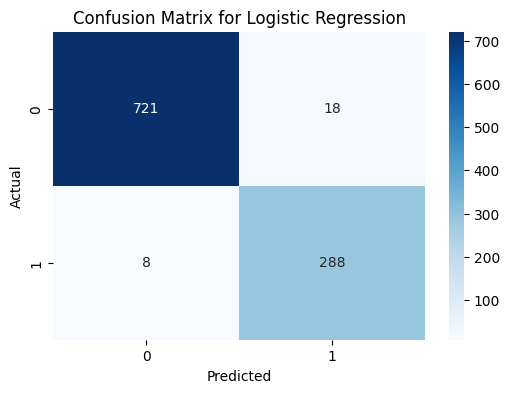

In [33]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# ROC Curve
y_prob = best_model_random.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
print(fpr,tpr)


[0.         0.         0.         0.00135318 0.00135318 0.00270636
 0.00270636 0.00405954 0.00405954 0.00541272 0.00541272 0.0067659
 0.0067659  0.00811908 0.00811908 0.00947226 0.00947226 0.01082544
 0.01082544 0.01488498 0.01488498 0.01623816 0.01623816 0.01759134
 0.01759134 0.01894452 0.01894452 0.02165088 0.02165088 0.02435724
 0.02435724 0.03112314 0.03112314 0.03518268 0.03518268 0.03924222
 0.03924222 0.04600812 0.04600812 0.0744249  0.0744249  0.33152909
 0.33152909 0.39512855 0.39512855 0.58728011 0.58728011 1.        ] [0.         0.00675676 0.33783784 0.33783784 0.69594595 0.69594595
 0.79391892 0.79391892 0.8277027  0.8277027  0.86148649 0.86148649
 0.875      0.875      0.88513514 0.88513514 0.90878378 0.90878378
 0.91554054 0.91554054 0.93243243 0.93243243 0.93581081 0.93581081
 0.95608108 0.95608108 0.96621622 0.96621622 0.96959459 0.96959459
 0.97297297 0.97297297 0.97635135 0.97635135 0.97972973 0.97972973
 0.98310811 0.98310811 0.98648649 0.98648649 0.98986486 0.9898

In [35]:
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

0.9922466444793915


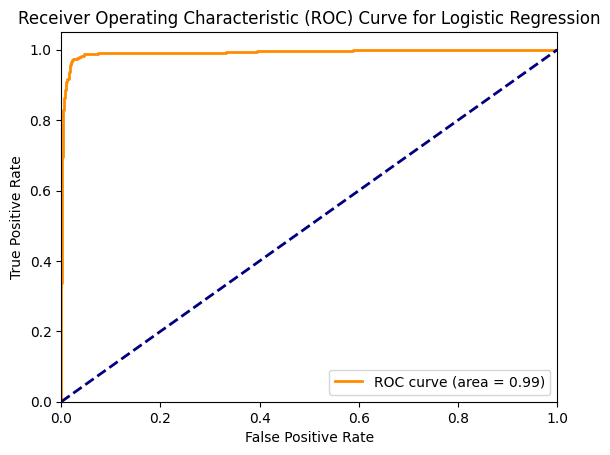

In [36]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

**Conclusion**

<u>Grid Search</u>

Thorough but computationally expensive. Effective for small parameter spaces.

<u>Random Search</u>

Efficient for larger parameter spaces. Provides good results with fewer iterations.

<u>Model Performance</u>

Hyperparameter tuning significantly improved model metrics.

<u>Computational Efficiency</u>

Limiting the parameter grid and using a data subset were effective strategies.